### 导入数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_table('data2.TXT')
DT = df.get_values()
DT

array([[2013001,       2,       6, ...,      24,      25,       6],
       [2013002,       3,       1, ...,      28,      30,      12],
       [2013003,       1,      22, ...,      28,      33,       9],
       ..., 
       [2016119,       1,       9, ...,      31,      32,       4],
       [2016120,       2,       2, ...,      25,      28,       9],
       [2016121,       3,       2, ...,      25,      28,       9]], dtype=int64)

### 红球各数字概率分布图

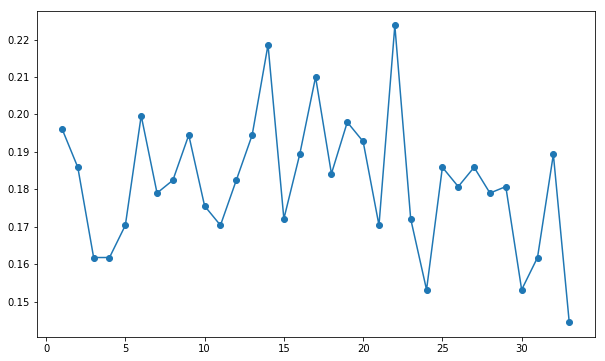

In [2]:
X = np.linspace(1,33,33)
R = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6']
Count = np.zeros(max(df['R6'])+1)
len(Count)
for i in range(len(df)):
    for r in R:
        Count[df.iloc[i][r]] += 1
        
P_Count = Count[1:]/581
plt.figure(figsize=(10,6))
plt.plot(X, P_Count, '-o');

### 计算累计概率

[ 0.19621343  0.38209983  0.54388985  0.70567986  0.87607573  1.0757315
  1.25473322  1.43717728  1.63166954  1.80722892  1.97762478  2.16006885
  2.3545611   2.57314974  2.74526678  2.93459552  3.14457831  3.32874355
  3.52667814  3.71944923  3.88984509  4.11359725  4.28571429  4.43889845
  4.62478485  4.80550775  4.99139415  5.17039587  5.35111876  5.50430293
  5.66609294  5.85542169  6.        ]


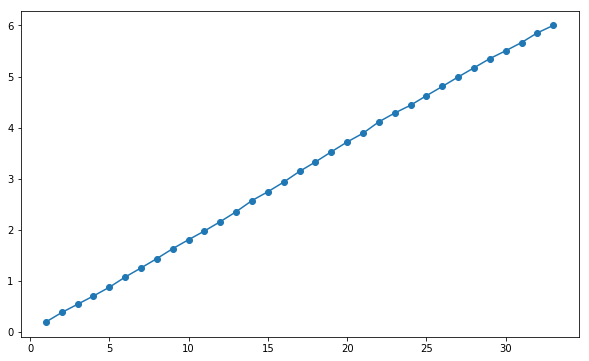

In [3]:
C_Count = np.cumsum(P_Count)
print(C_Count)

plt.figure(figsize=(10,6))
plt.plot(X, C_Count, '-o');

### 概率分布饼图 

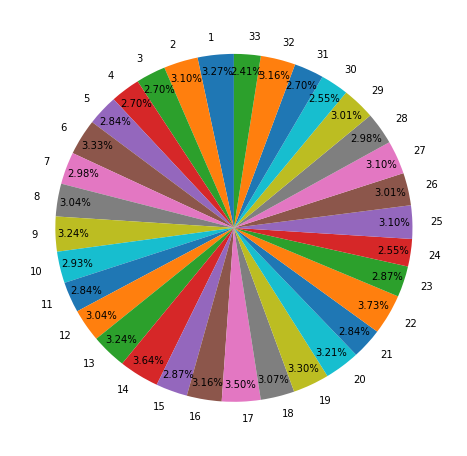

In [4]:
X = np.arange(1,34)
plt.figure(figsize=(8,8))
plt.pie(P_Count, labels=X, startangle = 90,autopct='%1.2f%%', pctdistance=0.90);

### 轮盘赌预测函数

In [5]:
import random

def Predict():
    L = []
    while len(L)<6:
        p = 6*random.random()
        for i in range(0,33):
            if p<C_Count[i]:
                if((i+1) not in L):
                    L.append(i+1)
                    break;

    L = np.sort(L)
    print(L)
    return L

In [6]:
Result = []
for i in range(20):
    print("%d: " %(i+1), end='')
    Result.append(Predict())

1: [ 2  4  5 15 26 31]
2: [ 5 10 11 16 17 20]
3: [ 8 16 18 28 31 32]
4: [14 19 23 24 27 31]
5: [ 6 11 13 27 28 31]
6: [ 3 12 13 19 20 21]
7: [10 15 16 19 24 28]
8: [ 6  8 18 21 23 29]
9: [ 2  3 15 25 27 28]
10: [ 3  4  7 10 19 31]
11: [ 1 12 16 17 24 30]
12: [ 1  6 10 20 28 33]
13: [17 18 20 21 25 33]
14: [ 2  5 10 16 18 21]
15: [ 2  5  9 14 17 18]
16: [ 2  3 16 19 29 33]
17: [ 3  9 16 22 28 31]
18: [ 2  5 18 19 20 31]
19: [ 7 14 15 17 19 31]
20: [ 3 15 16 21 32 33]


In [12]:
def Output(L, file):
    fout = open(file, 'w')
    for s in L:
        for x in s:
            fout.write(str(x) + '\t')
        fout.write('\n')
    print("数据成功导出到文件中")
    fout.close()

In [13]:
file = './Output_RandomPredict.txt'
Output(Result, file)

数据成功导出到文件中
